## Carga de librerías y lectura de csv

In [ ]:
import pandas as pd
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import numpy as np


In [ ]:
# Load the CSV file
csv_path = "../data/steam_reseñas.csv"
df = pd.read_csv(csv_path)

df.head()

,game_title,game_id,review,recommended,no_stopwords,clean_text,lemmatized_text,lemmatized_text_v2
0,Counter-Strike 2,730,juego de mierd4 te odio si un dia un amigo les...,True,juego mierd4 odio si dia amigo dice jueguen di...,juego mierd4 odio si dia amigo dice jueguen di...,juego mierd4 odiar si dia amigo decir jugar di...,mierd4 odiar dia amigo decir directamente bloq...
1,Counter-Strike 2,730,"Buen juego, es sorprendente la cantidad de ins...",True,buen juego sorprendente cantidad insultos crea...,buen juego sorprendente cantidad insultos crea...,buen juego sorprendente cantidad insulto creat...,sorprendente cantidad insulto creativo encontr...
2,Counter-Strike 2,730,"Este juego del diablo te deja: sin plata, sin ...",True,juego diablo deja plata amigos pareja futuro p...,juego diablo deja plata amigos pareja futuro p...,juego diablo dejar plata amigo parejo futuro p...,diablo dejar plata amigo parejo futuro platar ...
3,Counter-Strike 2,730,"El juego esta bien, el tema son los hackers qu...",True,juego bien tema hackers joden incluso premier ...,juego bien tema hackers joden incluso premier ...,juego bien tema hackers joden incluso premier ...,bien tema hackers joden incluso premier empare...
4,Counter-Strike 2,730,"10/10, racismo y degeneración a raudales. Si o...",True,1010 racismo degeneración raudales si odias vi...,1010 racismo degeneracion raudales si odias vi...,1010 racismo degeneracion raudal si odiar vida...,1010 racismo degeneracion raudal odiar vida pr...


In [ ]:
df["clean_text"].head()

,clean_text
0,juego mierd4 odio si dia amigo dice jueguen di...
1,buen juego sorprendente cantidad insultos crea...
2,juego diablo deja plata amigos pareja futuro p...
3,juego bien tema hackers joden incluso premier ...
4,1010 racismo degeneracion raudales si odias vi...


In [ ]:
#Eliminar reviews con menos de 10 palabras
df = df[df["review"].str.split().str.len() > 10]
df = df[df["no_stopwords"].str.split().str.len() > 10]
df = df[df["clean_text"].str.split().str.len() > 10]
df = df[df["lemmatized_text"].str.split().str.len() > 10]
df = df[df["lemmatized_text_v2"].str.split().str.len() > 10]


## Llamada al modelo y clasificación de sentimentos

In [ ]:
# Initialize the model and tokenizer
model_name = "VerificadoProfesional/SaBERT-Spanish-Sentiment-Analysis"
model = BertForSequenceClassification.from_pretrained("VerificadoProfesional/SaBERT-Spanish-Sentiment-Analysis")
tokenizer = BertTokenizer.from_pretrained("VerificadoProfesional/SaBERT-Spanish-Sentiment-Analysis")

# Function to predict sentiment for a single review
def predict_sentiment(review, threshold = 0.5):
    if not isinstance(review, str) or review.strip() == "":
        return "Unknown"  #Para evitar reviews vacías (no debería en casos de texto limpio)
    try:
        # Tokenize the input review
        inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

        # Perform inference
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits

        probabilities = torch.softmax(logits, dim=1).squeeze().tolist()

        predicted_class = torch.argmax(logits, dim=1).item()



        # Map the class to a sentiment label
        sentiment_map = {0: "Negative", 1: "Positive"}
        return sentiment_map[predicted_class]
    except Exception as e:
        print(f"Error processing review: {review[:50]}... Error: {e}")
        return "Unknown"

# Apply sentiment analysis to the 'review' column
df['sentiment_review'] = df['review'].apply(predict_sentiment)
df['sentiment_stopwords'] = df['no_stopwords'].apply(predict_sentiment)
df['sentiment_clean'] = df['clean_text'].apply(predict_sentiment)
df['sentiment_lemma'] = df['lemmatized_text'].apply(predict_sentiment)
df['sentiment_lemmav2'] = df['lemmatized_text_v2'].apply(predict_sentiment)


#Save csv
df.to_csv('../data/steam_reviews_with_sentiment.csv', index=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

In [ ]:
#Df columnas de sentiment que contengan 'Unknown'
df[df['sentiment'].str.contains('Negative')]


,game_title,game_id,review,recommended,no_stopwords,clean_text,lemmatized_text,lemmatized_text_v2,sentiment
0,Counter-Strike 2,730,juego de mierd4 te odio si un dia un amigo les...,True,juego mierd4 odio si dia amigo dice jueguen di...,juego mierd4 odio si dia amigo dice jueguen di...,juego mierd4 odiar si dia amigo decir jugar di...,mierd4 odiar dia amigo decir directamente bloq...,Negative
2,Counter-Strike 2,730,"Este juego del diablo te deja: sin plata, sin ...",True,juego diablo deja plata amigos pareja futuro p...,juego diablo deja plata amigos pareja futuro p...,juego diablo dejar plata amigo parejo futuro p...,diablo dejar plata amigo parejo futuro platar ...,Negative
4,Counter-Strike 2,730,"10/10, racismo y degeneración a raudales. Si o...",True,1010 racismo degeneración raudales si odias vi...,1010 racismo degeneracion raudales si odias vi...,1010 racismo degeneracion raudal si odiar vida...,1010 racismo degeneracion raudal odiar vida pr...,Negative
5,Counter-Strike 2,730,"la comunidad es un mierda, las mecanicas son a...",True,comunidad mierda mecanicas complicados si paga...,comunidad mierda mecanicas complicados si paga...,comunidad mierda mecanica complicado si pagar ...,comunidad mierda mecanica complicado pagar pre...,Negative
6,Counter-Strike 2,730,Un juego increíble al igual que lo que se la s...,True,juego increíble igual suda valve solo buscan o...,juego increible igual suda valve solo buscan o...,juego increible igual sudar valve solo buscar ...,increible igual sudar valve buscar obtener din...,Negative
...,...,...,...,...,...,...,...,...,...
9985,Laika: Aged Through Blood,1796220,Acabo el juego y he de decir que me ha costado...,False,acabo juego decir costado bastante acabarlo oj...,acabo juego decir costado bastante acabarlo oj...,acabar juego decir costado bastante acabar el ...,acabar decir costado bastante acabar ojala gus...,Negative
9993,Call of Duty®: Modern Warfare® 2 (2009),10180,Ojala la actual activision se esmerara en hace...,True,ojala actual activision esmerara hacer campaña...,ojala actual activision esmerara hacer campana...,ojala actual activision esmeraro hacer campana...,ojala actual activision esmeraro campana atrap...,Negative
9994,Call of Duty®: Modern Warfare® 2 (2009),10180,"aprobado, sin embargo es un completo desperdic...",True,aprobado embargo completo desperdicio juego co...,aprobado embargo completo desperdicio juego co...,aprobar embargo completo desperdicio juego com...,aprobar embargo completo desperdicio comparado...,Negative
9996,Call of Duty®: Modern Warfare® 2 (2009),10180,"lo he bajado con una rebaja, pero lo quiero ju...",False,bajado rebaja quiero jugar pone pantalla negra...,bajado rebaja quiero jugar pone pantalla negra...,bajado rebaja querer jugar poner pantalla negr...,bajado rebaja querer poner pantalla negro abri...,Negative


## Interpretación de los resultados

In [ ]:
# Cargar los datos
df = pd.read_csv('../data/steam_reviews_with_sentiment.csv')


In [ ]:
# Lista de columnas con valores 'Positive'/'Negative'
sentiment_columns = [
    'sentiment_review',
    'sentiment_stopwords',
    'sentiment_clean',
    'sentiment_lemma',
    'sentiment_lemmav2'
]

# Crear nuevas columnas booleanas basadas en las de sentimiento
for col in sentiment_columns:
    df[f"{col}_bool"] = df[col].map({'Positive': True, 'Negative': False})

# Mostrar las nuevas columnas añadidas
df[[f"{col}_bool" for col in sentiment_columns]].head()

,sentiment_review_bool,sentiment_stopwords_bool,sentiment_clean_bool,sentiment_lemma_bool,sentiment_lemmav2_bool
0,False,False,False,False,False
1,True,True,True,True,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,True,True,True


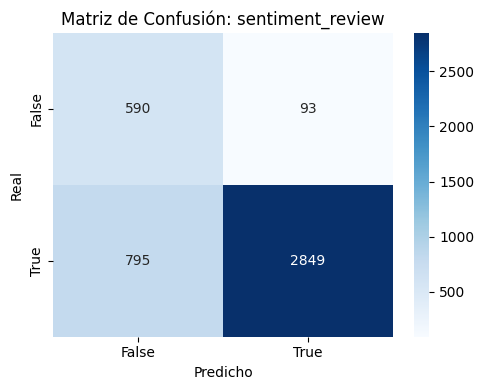

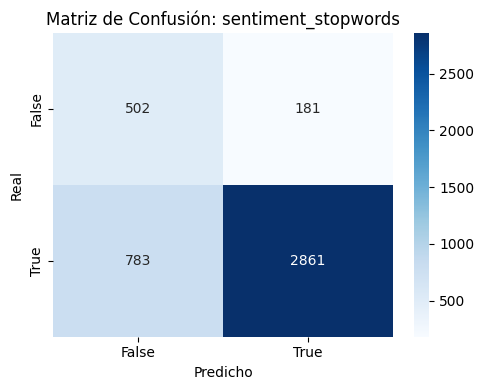

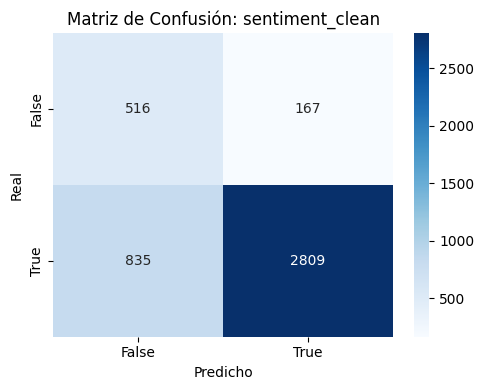

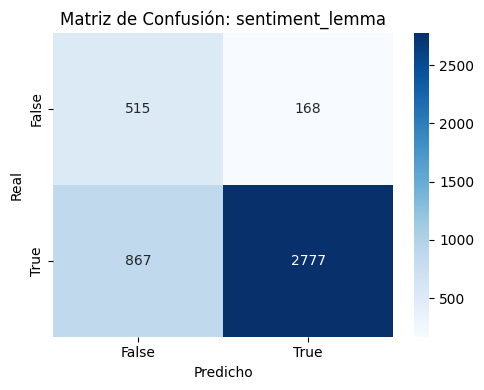

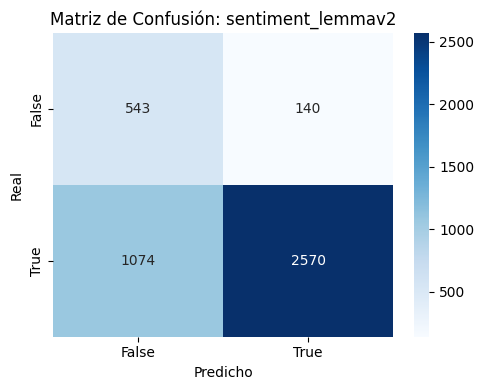

{}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Variable verdadera (etiqueta real del usuario)
y_true = df['recommended']

# Generar los reports y matrices gráficas
reports = {}

# Crear gráficos para cada columna de predicción
for col in sentiment_columns:

    y_pred = df[f"{col}_bool"]
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    plt.title(f'Matriz de Confusión: {col}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

reports

In [ ]:
classification_report(y_true, df["sentiment_review_bool"], output_dict=True)



{'False': {'precision': 0.4259927797833935,
  'recall': 0.8638360175695461,
  'f1-score': 0.5705996131528046,
  'support': 683.0},
 'True': {'precision': 0.9683888511216859,
  'recall': 0.7818331503841932,
  'f1-score': 0.8651685393258427,
  'support': 3644.0},
 'accuracy': 0.7947769817425469,
 'macro avg': {'precision': 0.6971908154525397,
  'recall': 0.8228345839768696,
  'f1-score': 0.7178840762393237,
  'support': 4327.0},
 'weighted avg': {'precision': 0.8827737559693739,
  'recall': 0.7947769817425469,
  'f1-score': 0.8186719882335883,
  'support': 4327.0}}

In [ ]:
classification_report(y_true, df["sentiment_clean_bool"], output_dict=True)

{'False': {'precision': 0.38193930421909694,
  'recall': 0.7554904831625183,
  'f1-score': 0.5073746312684366,
  'support': 683.0},
 'True': {'precision': 0.9438844086021505,
  'recall': 0.7708562019758507,
  'f1-score': 0.8486404833836858,
  'support': 3644.0},
 'accuracy': 0.7684307834527386,
 'macro avg': {'precision': 0.6629118564106238,
  'recall': 0.7631733425691845,
  'f1-score': 0.6780075573260612,
  'support': 4327.0},
 'weighted avg': {'precision': 0.8551835751624405,
  'recall': 0.7684307834527386,
  'f1-score': 0.7947730054556259,
  'support': 4327.0}}

In [ ]:
classification_report(y_true, df["sentiment_stopwords_bool"], output_dict=True)

{'False': {'precision': 0.3906614785992218,
  'recall': 0.7349926793557833,
  'f1-score': 0.5101626016260162,
  'support': 683.0},
 'True': {'precision': 0.940499671268902,
  'recall': 0.785126234906696,
  'f1-score': 0.8558181274304517,
  'support': 3644.0},
 'accuracy': 0.7772128495493413,
 'macro avg': {'precision': 0.6655805749340619,
  'recall': 0.7600594571312396,
  'f1-score': 0.682990364528234,
  'support': 4327.0},
 'weighted avg': {'precision': 0.8537098664171822,
  'recall': 0.7772128495493413,
  'f1-score': 0.801257756706063,
  'support': 4327.0}}

In [ ]:
classification_report(y_true, df["sentiment_lemma_bool"], output_dict=True)

{'False': {'precision': 0.37264833574529665,
  'recall': 0.7540263543191801,
  'f1-score': 0.49878934624697335,
  'support': 683.0},
 'True': {'precision': 0.9429541595925297,
  'recall': 0.7620746432491767,
  'f1-score': 0.8429200182121718,
  'support': 3644.0},
 'accuracy': 0.7608042523688467,
 'macro avg': {'precision': 0.6578012476689132,
  'recall': 0.7580504987841784,
  'f1-score': 0.6708546822295726,
  'support': 4327.0},
 'weighted avg': {'precision': 0.8529336193365418,
  'recall': 0.7608042523688467,
  'f1-score': 0.7886003396930522,
  'support': 4327.0}}

In [ ]:
classification_report(y_true, df["sentiment_lemmav2_bool"], output_dict=True)

{'False': {'precision': 0.3358070500927644,
  'recall': 0.7950219619326501,
  'f1-score': 0.4721739130434783,
  'support': 683.0},
 'True': {'precision': 0.948339483394834,
  'recall': 0.7052689352360044,
  'f1-score': 0.8089392508655965,
  'support': 3644.0},
 'accuracy': 0.7194360989137971,
 'macro avg': {'precision': 0.6420732667437992,
  'recall': 0.7501454485843273,
  'f1-score': 0.6405565819545374,
  'support': 4327.0},
 'weighted avg': {'precision': 0.8516536382491642,
  'recall': 0.7194360989137971,
  'f1-score': 0.7557821614890061,
  'support': 4327.0}}

## Ejemplos de errores de clasificación

In [ ]:
# Filtrar ejemplos de errores de clasificación:
# Donde el modelo predijo positivo (True) pero la etiqueta real es negativa (False)

errores_lemmav2 = df[
    (df["sentiment_review_bool"] == True) & (df["recommended"] == False)
][["review", "sentiment_review_bool", "recommended", "game_title"]]

errores_lemmav2



,review,sentiment_review_bool,recommended,game_title
7,"Valve, si se me desconecta por mala conexion o...",True,False,Counter-Strike 2
11,"He jugado poco, pero ya he visto suficiente. N...",True,False,Counter-Strike 2
55,Injugable mucho ruso y moros diciendo que ofic...,True,False,Counter-Strike 2
96,Mmh a decir verdad me lo descargue solo porque...,True,False,Dota 2
323,lo mejor que jugué \nPEROOOOOO después de 1 h...,True,False,Cyberpunk 2077
...,...,...,...,...
3812,El juego en sí es muy bueno pero mi voto negat...,True,False,Total War: WARHAMMER - Call of the Beastmen
4036,"Una especie de Mr.Prepper, se acaba haciendo r...",True,False,Into the Dead: Our Darkest Days
4110,Juego mediocre!\nMisiones horribles llenas de ...,True,False,Necromunda: Hired Gun
4250,"Como ya había sucedido en el pasado, DLC de ra...",True,False,Total War: WARHAMMER II - The Shadow & The Blade
